## Simulating Same Score Streaks

This notebook shows some basics of running simulations in julia.  First, there will be some simple dice rolling simulations and then followed by some simulations based on continuous distributions, then the same-score streaks.

### Simulating Dice Rolls

First, we will load the Random package (which should be standard, so you don't need to download) and set the seed so that the results are consistent. 

In [1]:
using Random, StatsBase, StatsPlots

In [2]:
Random.seed!(1234);

The following would rolling a single die 100 times

In [3]:
die100 = rand(1:6,100)

100-element Vector{Int64}:
 2
 4
 2
 6
 3
 3
 6
 5
 3
 5
 4
 5
 1
 ⋮
 6
 3
 5
 3
 2
 5
 1
 3
 4
 3
 3
 6

And we may be interested in the number of times each value is observed.  We'll do this with the `counts` function (in the `StatsBase` package):

In [4]:
die_count = counts(die100,1:6)

6-element Vector{Int64}:
 12
 13
 20
 17
 20
 18

This shows the number of times the 1,2,3,4,5,6 appear respectively. And following is a bar plot of this:

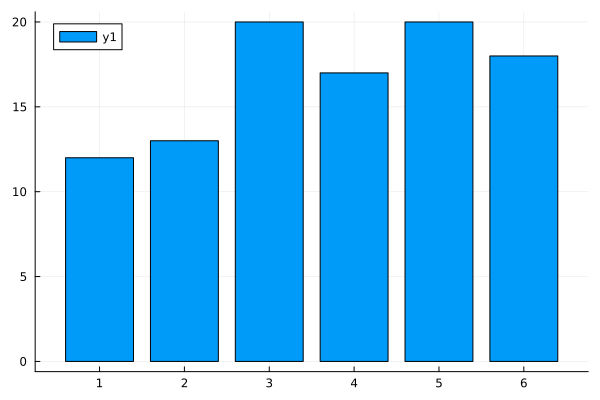

In [5]:
bar(1:6,die_count)

Either the actual rolls in `die100` or `dice_count` can be used to similate a die roll, however since rolling a single die is relative simple to analyze, let's consider some more difficult situations.  

## Similation of the rolling of two dice

First, let's examine rolling two dice. The following will roll a pair of 6-sided dice 10,000 times (which you can put into julia with `10_000`).

In [6]:
two_dice = rand(1:6,10_000,2);

Typically problems involving pair of dice include using the sum of the rolls. We can do that with the following:

In [7]:
two_dice_sum = mapslices(sum,two_dice, dims = [2]);

The `mapslices` function applied a function (in the case, the `sum`) along a dimension of the array/matrix. We want the rows to be added so apply along the columns (dimension 2).  Now we count up all of the possibilities from 2 to 12 with the `counts` function.

In [8]:
two_dice_count = counts(two_dice_sum,2:12)

11-element Vector{Int64}:
  283
  511
  802
 1135
 1444
 1688
 1425
 1104
  839
  520
  249

And a bar plot is

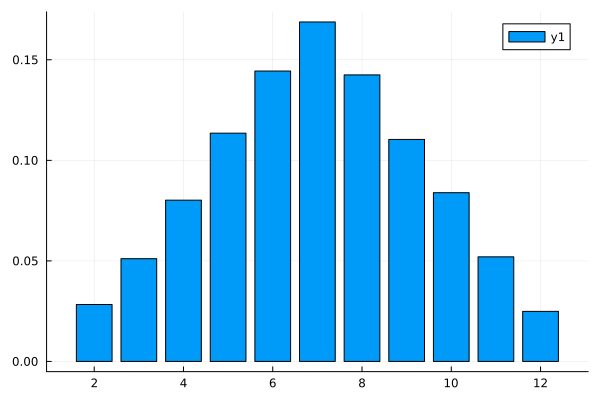

In [9]:
bar(2:12,two_dice_count/sum(two_dice_count), xticks=2:2:12)

Which is a similated distribution of the dice sum.  We can compare this to the known distribution of rolling a pair of fair dice with

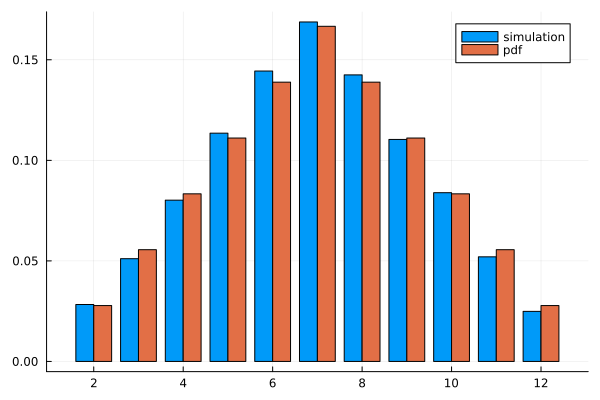

In [9]:
groupedbar(2:12,hcat(two_dice_count/sum(two_dice_count),[(6-abs(i-7))/36 for i=2:12]), xticks=2:2:12, 
    label=["simulation" "pdf"])

where "pdf" means the probability distribution function.  As you can see the results are quite similar, but not exact.  If we increase the number of dice rolled from 10,000 to a much number the similation would be closer.  Try using a million rolls and repeating.

## Similating rolling five dice

We'll repeat the steps above for rolling five dice.  This is getting closer to where a similation would be quite helpful. The actual probably distribution can be found analytically by writing down all possibility of rolling, however this is $6^5=7776$ and carefully counting the sum of each of the rolls from 6 to 36. (The saving part of this is the symmetric), but perhaps this is a tedious problem. 

Therefore we will use simulation to find the distribution and answer questions.

In [10]:
five_dice = rand(1:6,1_000_000,5);

Typically problems involving pair of dice include using the sum of the rolls. We can do that with the following:

In [11]:
five_dice_sum = mapslices(sum,five_dice, dims = [2]);

The `mapslices` function applied a function (in the case, the `sum`) along a dimension of the array/matrix. We want the rows to be added so apply along the columns (dimension 2).  Now we count up all of the possibilities from 2 to 12 with?

In [12]:
five_dice_count = counts(five_dice_sum,5:30)

26-element Vector{Int64}:
    130
    641
   1855
   4538
   8910
  16235
  26331
  39049
  54071
  69443
  83966
  94326
 100931
 100186
  94586
  84038
  69181
  53588
  39379
  26307
  16145
   8839
   4548
   1967
    669
    141

We can define the probability distribution for the sum of five dice as

In [13]:
five_dice_pdf = five_dice_count/sum(five_dice_count);

And a bar plot is

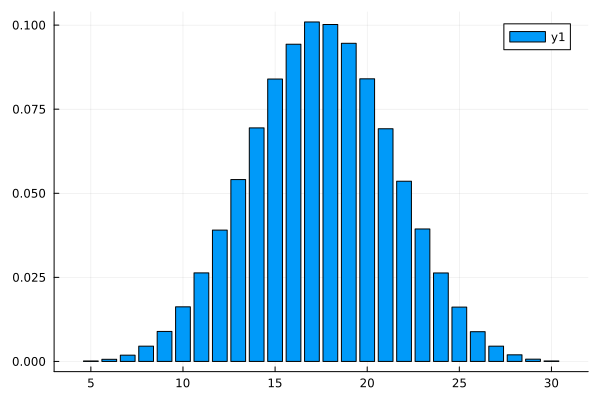

In [14]:
bar(5:30,five_dice_pdf, xticks=5:5:30)

You may notice it looks a little like a normal distribution (hold on to that) but thank the central limit theorem for this. 

But also, we can now answer questions about the pdf as well.  Here's a few that we have

1. _What is the probability the sum of five dice is greater than or equal to 20._

We basically just need the sum of the values in the pdf corresponding to 20 and higher.  This is a bit complicated because the $X=5$ is in the first element of the `five_dice_pdf`, so we could do

In [15]:
sum(five_dice_pdf[16:end])

0.30480199999999996

However, this requires some head scratching about where the 16 came from. Instead, we can use the `count` function and put in the range of values we're interested in:

In [16]:
count(x->x >=20, five_dice_sum)/length(five_dice_sum)

0.304802

and notice that the value is the same, but you naturally see the $X \geq 20$ in the code in the above line and don't have to ponder where 16 came from in the `sum(five_dice_pdf[16:end])`.

2. Find the probability that the sum of the dice is an odd number.

For this, we can sum the pdf for every other element of the `five_dice_pdf` vector or

In [17]:
sum(five_dice_pdf[1:2:end])

0.5007020000000001

which isn't suprising that it is near 0.5.  If we want to use the `count` function we can do this with

In [18]:
count(x-> x % 2 == 1, five_dice_sum)/length(five_dice_sum)

0.500702

and this using the modulo function `%`, so this finds where the sum modulo 2 is 1. 

3. What is the probability that all of the dice have the same value?  

This question doesn't have to do with the sum, so we need to return to the matrix that stores all of the rolls `five_dice`.  We need to go through the rows and determine which rows have the same value. There are a number of ways to do this.  I like

In [19]:
all_same = mapslices(row -> length(unique(row))== 1, five_dice, dims = [2])

1000000×1 Matrix{Bool}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 0
 1
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

for each row, `unique` returns a vector of unique values.  If the length of this vector is 1, then they are all the same.  We then count the total number of the `all_same` vector to find the total number of rolls that are the same and turn it into a probability.

In [20]:
sum(all_same)/length(all_same)

0.000801

Note: this is a relatively simple calculation analytically.  See if you can determine the exact value of this probability. 

## Same Score simulations

Let's turn to the simulations of same scores.  However, before analyzing basketball scores, let's do this on a simpler made up game.  Let's say that we have a game that each of two players can score 0,1,2,3,4,5 points.  To get some distribution, we'll use the binomial distribution (and need the `Distributions` package)

In [21]:
using Distributions

In [22]:
score1 = Binomial(4,0.55)
score2 = Binomial(5,0.75)

Binomial{Float64}(n=5, p=0.75)

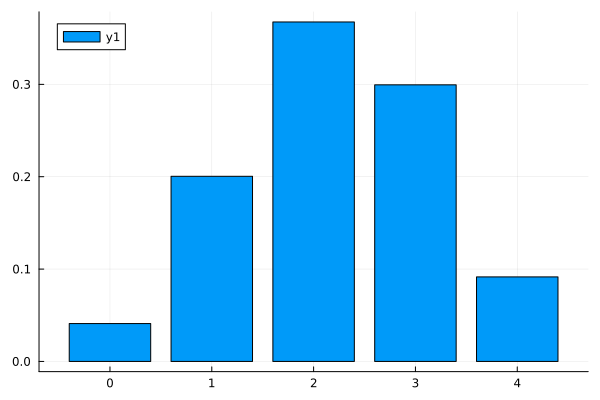

In [23]:
bar(score1)

A score distribution for this made-up game can be created by adding the two players probability for scoring $i$ and $j$ on the game respectively.  (I see you pondering why did we add, when the sum of two probablity distribution cannot be a probability distribution.  Hold on there).  

Let's also assume that there isn't a tie in this game so we zero out all of the probabilities where there is a tie.  Then lastly, we need to make this a PDF by dividing by the total sum.  (For those that pondered above, we needed to rescale this pdf anyway, so why not add).

In [24]:
score_dist = [pdf(score1,i)+pdf(score2,j) for i=0:5,j=0:5]; 
for i=1:6 score_dist[i,i]=0 end
score_dist = score_dist / sum(score_dist)

6×6 Matrix{Float64}:
 0.0         0.00556547  0.0128897   0.0304678  0.0436514  0.0278311
 0.0201452   0.0         0.0288366   0.0464147  0.0595983  0.043778
 0.0368514   0.0382186   0.0         0.0631209  0.0763045  0.0604842
 0.0300452   0.0314123   0.0387366   0.0        0.0694983  0.053678
 0.00924828  0.0106155   0.0179397   0.0355178  0.0        0.0328811
 9.76563e-5  0.00146484  0.00878906  0.0263672  0.0395508  0.0

Let's take a look at this.  Unfortunately the plots package in julia doesn't handle 3D bar plots very well, so we'll plot a heat map, which shows a different color for each value. 

In [25]:
using Plots

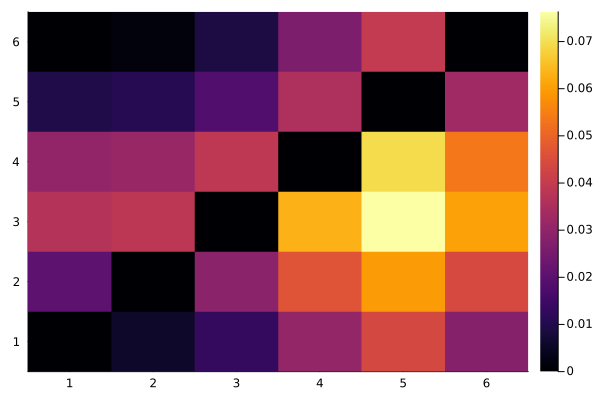

In [27]:
heatmap(score_dist)

The way to interpret this plot is that the brighter colors (yellow) have higher probabilities and the darker ones (close to black) are 0 or near 0.  The highest probabilty is the score of 3 to 5 and there is a band of zero probabilities along the diagonal where we said there are no ties.  